In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import pycountry_convert as pc
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [168]:
df=pd.read_csv('/Users/ankita/Downloads/ds_salaries.csv')

In [171]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [175]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [177]:
df.isnull().sum()


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [179]:
df['job_title'] = df['job_title'].str.lower()
df['employment_type'] = df['employment_type'].str.lower()
df['company_size'] = df['company_size'].str.lower()
df['experience_level'] = df['experience_level'].str.lower()


In [181]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [182]:
import pycountry

# Function to convert country code to full country name
def country_name(code):
    try:
        country = pycountry.countries.get(alpha_2=code)
        return country.name
    except:
        return code  # If code not found, return the original code

# Apply function to company_location
df['company_location_full'] = df['company_location'].apply(country_name)

# Check results
df[['company_location', 'company_location_full']].head()

,company_location,company_location_full
0,DE,Germany
1,JP,Japan
2,GB,United Kingdom
3,HN,Honduras
4,US,United States


In [183]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_location_full
0,0,2020,mi,ft,data scientist,70000,EUR,79833,DE,0,DE,l,Germany
1,1,2020,se,ft,machine learning scientist,260000,USD,260000,JP,0,JP,s,Japan
2,2,2020,se,ft,big data engineer,85000,GBP,109024,GB,50,GB,m,United Kingdom
3,3,2020,mi,ft,product data analyst,20000,USD,20000,HN,0,HN,s,Honduras
4,4,2020,se,ft,machine learning engineer,150000,USD,150000,US,50,US,l,United States


In [184]:
pip install pycountry_convert


Note: you may need to restart the kernel to use updated packages.


In [185]:
import pycountry_convert as pc

# Function to get continent name from country code
def country_to_continent(country_code):
    try:
        country_alpha2 = country_code
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = {
            'AF': 'Africa',
            'NA': 'North America',
            'OC': 'Oceania',
            'AN': 'Antarctica',
            'AS': 'Asia',
            'EU': 'Europe',
            'SA': 'South America'
        }
        return continent_name[continent_code]
    except:
        return 'Unknown'

# Apply the function
df['continent'] = df['company_location'].apply(country_to_continent)

# Check
df[['company_location', 'company_location_full', 'continent']].head()


,company_location,company_location_full,continent
0,DE,Germany,Europe
1,JP,Japan,Asia
2,GB,United Kingdom,Europe
3,HN,Honduras,North America
4,US,United States,North America


In [186]:
# Drop 'Unnamed: 0' and 'company_location' columns
df.drop(['Unnamed: 0', 'company_location'], axis=1, inplace=True)

In [187]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,company_location_full,continent
0,2020,mi,ft,data scientist,70000,EUR,79833,DE,0,l,Germany,Europe
1,2020,se,ft,machine learning scientist,260000,USD,260000,JP,0,s,Japan,Asia
2,2020,se,ft,big data engineer,85000,GBP,109024,GB,50,m,United Kingdom,Europe
3,2020,mi,ft,product data analyst,20000,USD,20000,HN,0,s,Honduras,North America
4,2020,se,ft,machine learning engineer,150000,USD,150000,US,50,l,United States,North America


In [191]:

df['experience_level'] = df['experience_level'].str.upper()
experience_mapping = {
    'EN': 'Entry-level / Junior',
    'MI': 'Mid-level / Intermediate',
    'SE': 'Senior-level / Expert',
    'EX': 'Executive-level / Director'
}

df['experience_level'] = df['experience_level'].map(experience_mapping)

In [193]:
df.rename(columns={'company_location_full': 'country'}, inplace=True)

# Save the cleaned dataframe to CSV
df.to_csv('cleaned_salary_data.csv', index=False)

In [198]:

# Set clean style (no grid)
sns.set_style('white')
plt.rcParams['font.family'] = 'Arial'

# Set custom color palette
custom_palette = ['#4169E1']  # Royal Blue (or your favorite color)
sns.set_palette(custom_palette)


## Next Step: Exploratory Data Analysis

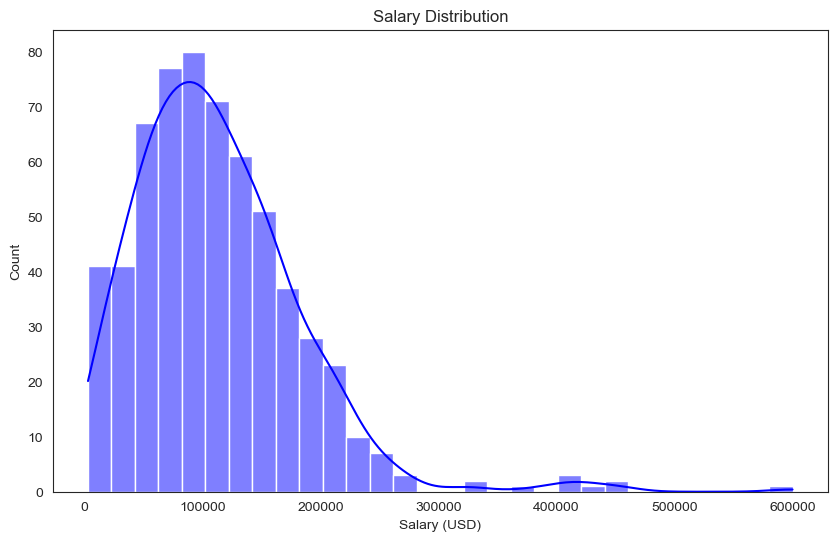

In [203]:

plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], kde=True, bins=30, color='blue')
plt.title('Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Count')
plt.show()

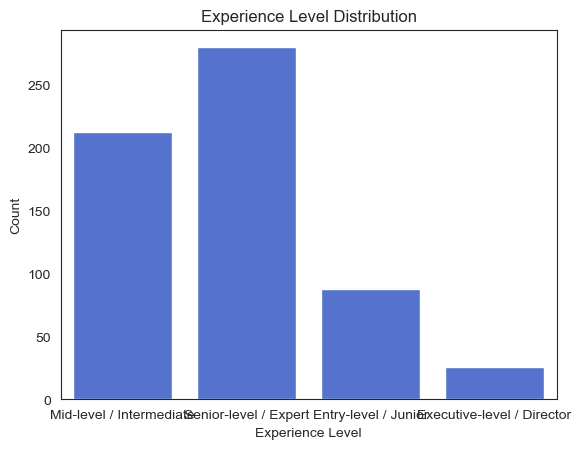

In [206]:
sns.countplot(data=df, x='experience_level')
plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


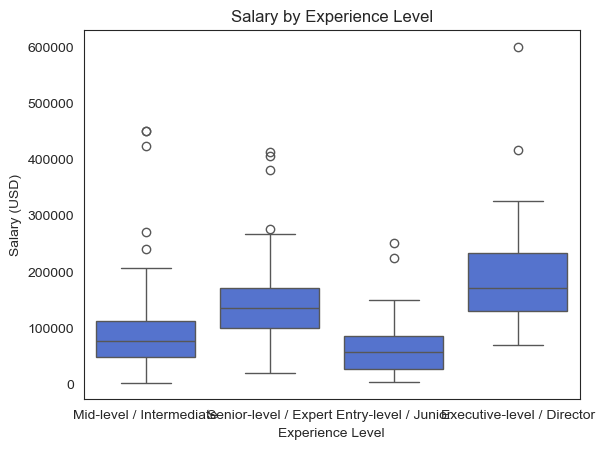

In [208]:
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()


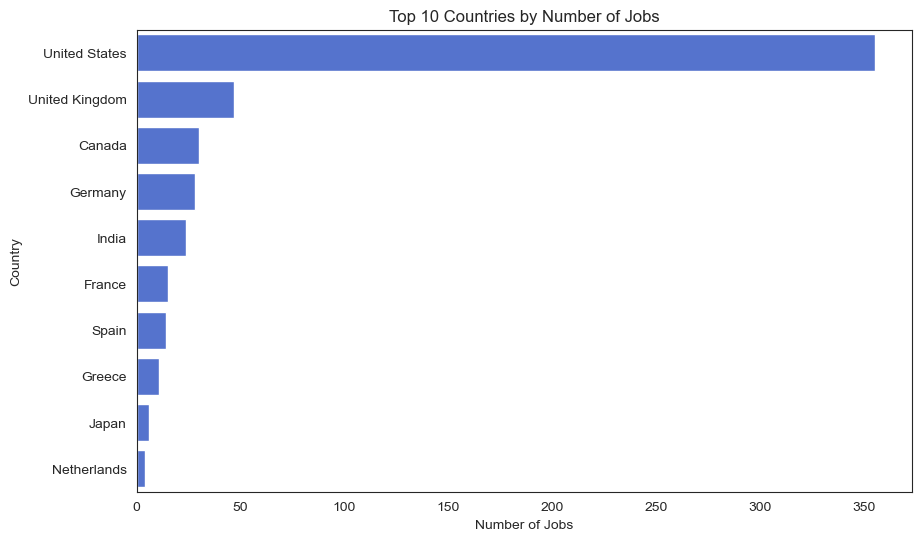

In [210]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Country')
plt.show()


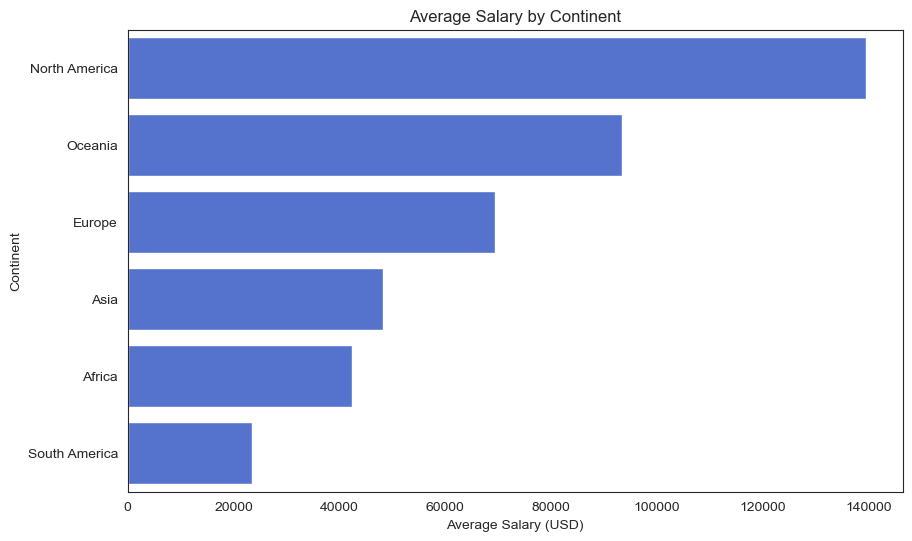

In [212]:
avg_salary_continent = df.groupby('continent')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_continent.values, y=avg_salary_continent.index)
plt.title('Average Salary by Continent')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Continent')
plt.show()


##  Correlation

In [216]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Check correlation with salary
salary_corr = correlation_matrix['salary_in_usd'].sort_values(ascending=False)

print(salary_corr)




salary_in_usd    1.000000
work_year        0.170493
remote_ratio     0.132122
salary          -0.083906
Name: salary_in_usd, dtype: float64


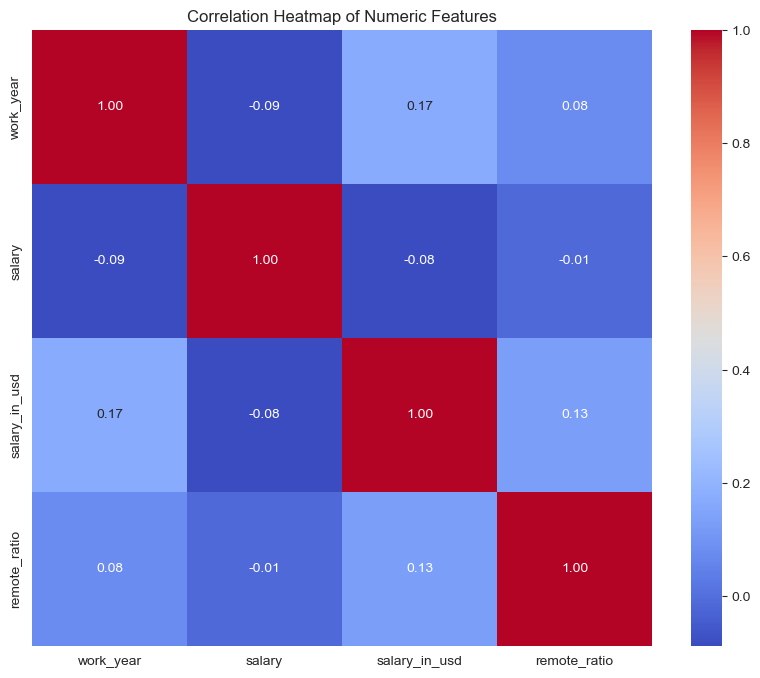

In [218]:


plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()



#### Inference from Correlation Heatmap:

- **work_year** has a very weak positive correlation (**+0.17**) with **salary_in_usd**.
  - Interpretation: Salaries have slightly increased over time, but the trend is not very strong.
  
- **remote_ratio** shows a small positive correlation (**+0.13**) with **salary_in_usd**.
  - Interpretation: Jobs offering higher remote flexibility tend to have slightly higher salaries.

- **salary** (original currency) has almost no correlation (**-0.08**) with **salary_in_usd**.
  - Interpretation: This validates the importance of using standardized salary values (USD) for analysis.

- Overall, no strong linear correlation is observed between numeric variables and salary.
  - Categorical variables (e.g., experience level, job title, company size, country) are likely to have a greater impact on salary prediction and should be included in further modeling.



### Feature Engineering 

In [222]:
# Check the data types
print(df.dtypes)



work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_size          object
country               object
continent             object
dtype: object


In [224]:
# Drop unwanted columns
df = df.drop(['salary', 'salary_currency', 'employee_residence'], axis=1)


In [227]:
# Apply one-hot encoding to all object columns
df_encoded = pd.get_dummies(df, drop_first=True)


In [229]:
# Define features and target
X = df_encoded.drop('salary_in_usd', axis=1)
y = df_encoded['salary_in_usd']
from sklearn.model_selection import train_test_split

# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [101]:


# Initialize model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Root Mean Squared Error (RMSE): 663643740137799.75
R² Score: -114915868059354644480.00


In [232]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [234]:
# Predict salaries for X_test
y_pred_rf = rf_model.predict(X_test)


In [236]:
# Calculate RMSE and R² Score
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest RMSE: 48062.74
Random Forest R² Score: 0.40


####  Random Forest Model

After establishing Linear Regression as a baseline, we trained a Random Forest Regressor to improve model performance.

Random Forest is a powerful ensemble machine learning algorithm that builds multiple decision trees and averages their results to provide more accurate and robust predictions.

### ✅ Results:

- **Root Mean Squared Error (RMSE)**: 48,062.74
- **R² Score**: 0.40

### 📈 Inference:

- The Random Forest model significantly improved the prediction accuracy compared to Linear Regression.
- With an R² score of 0.40, the model explains 40% of the variability in salaries, which is reasonable given the complexity and noise typically present in salary datasets.
- RMSE indicates that on average, the salary predictions are within approximately \$48,000 of the actual salaries.

### 🎯 Next Steps:

- Further model improvements could be explored by applying hyperparameter tuning (adjusting n_estimators, max_depth, etc.).
- Trying more advanced models like **XGBoost** could potentially enhance prediction performance even further.

---


In [239]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [77]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

df_encoded = pd.get_dummies(df, drop_first=True)

# Define X and y
X = df_encoded.drop('salary_in_usd', axis=1)
y = df_encoded['salary_in_usd']

# Split into Train and Test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [79]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost RMSE: 52200.61
XGBoost R² Score: 0.29


## 🚀 XGBoost Model

XGBoost Regressor was also trained to predict salaries. However, the model did not outperform Random Forest in this case.

### ✅ Results:

- **Root Mean Squared Error (RMSE)**: 52,200.61
- **R² Score**: 0.29

### 📈 Inference:

- XGBoost explained about 29% of salary variance.
- The RMSE was slightly higher than Random Forest.
- Possible reasons include small dataset size, heavy one-hot encoding, and lack of hyperparameter tuning.

### 🎯 Conclusion:

- Random Forest remains the best performing model for this dataset, achieving a lower RMSE and higher R² score compared to both Linear Regression and XGBoost.

---


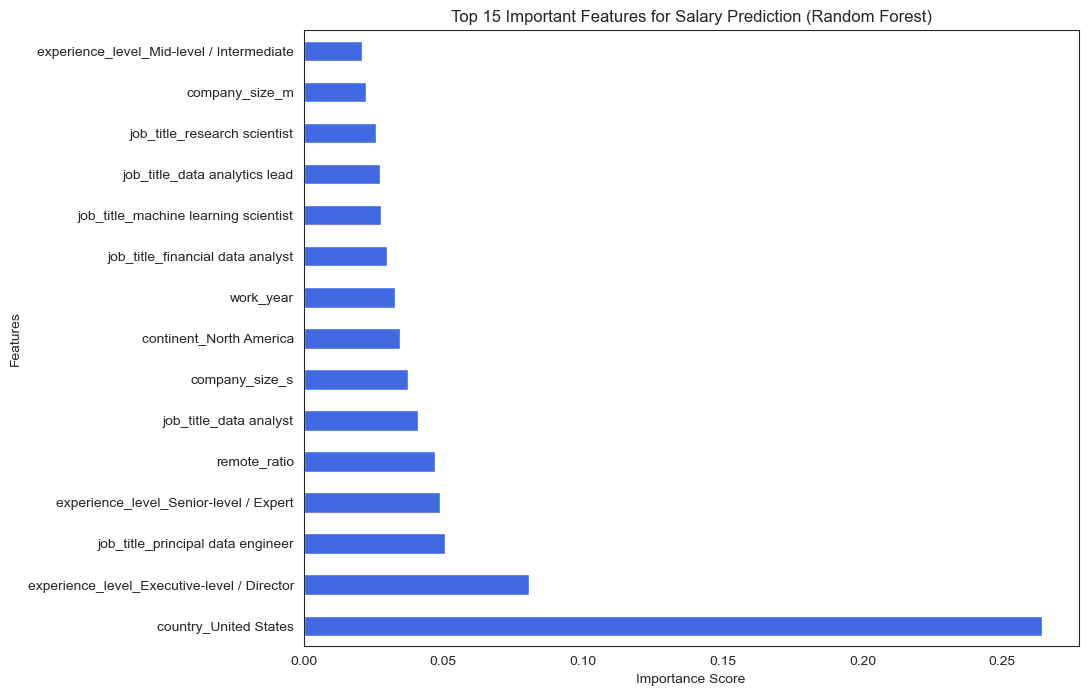

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and plot
feature_importances.nlargest(15).plot(kind='barh', figsize=(10,8))
plt.title('Top 15 Important Features for Salary Prediction (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## Error Analysis

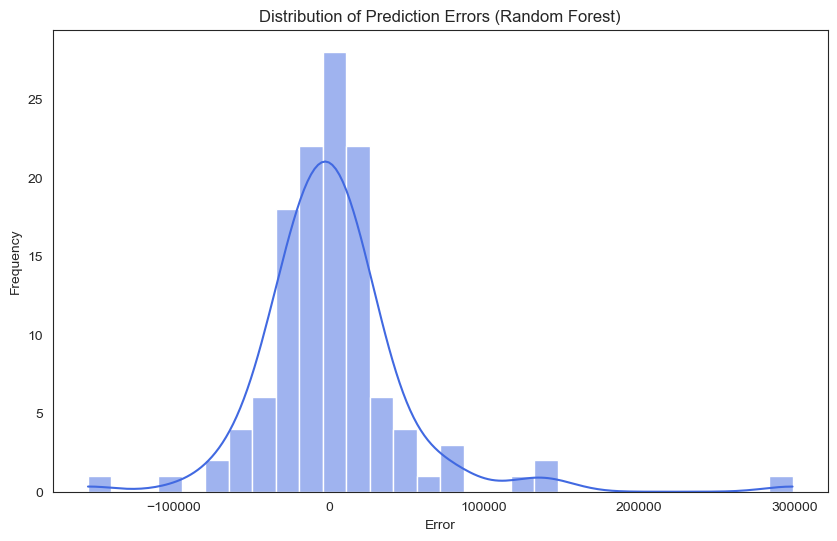

In [85]:
import seaborn as sns

# Calculate error
error = y_test - y_pred_rf

# Plot error distribution
plt.figure(figsize=(10,6))
sns.histplot(error, bins=30, kde=True)
plt.title('Distribution of Prediction Errors (Random Forest)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


#### The model's errors are mostly small and symmetrically distributed.

✅ The model is stable — not severely biased toward overprediction or underprediction.

✅ Some large errors exist, but they are not common (which is normal).

✅ The model's errors are mostly small and symmetrically distributed.

## Model Comparison

| Model                   | RMSE               | R² Score                 |
|:------------------------| -------------------| -------------------------|
| Linear Regression       | 663643740137799.75 | -114915868059354644480.00|
| Random Forest Regressor | 48062.74           | 0.40                     |
| XGBoost Model           | 52200.61           | 0.29                     |

- Random Forest Regressor outperforms Linear Regression and XGBoost Model by achieving a higher R² score and a lower RMSE.
- Thus, Random Forest is selected as the final model for predicting salaries.
